1. Regresja logistyczna - Python

In [1]:
import csv
import math
import numpy as np
from matplotlib import pyplot as plt

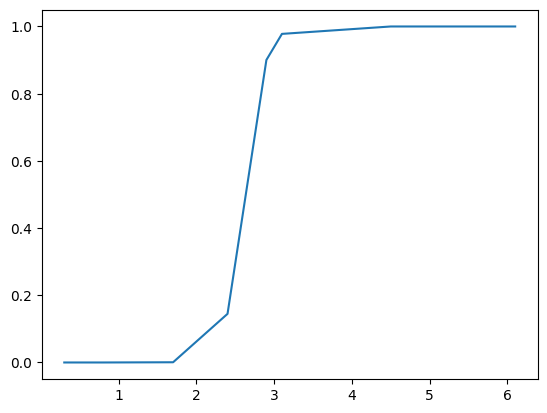

In [93]:
X = np.array([[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
              [0.3, 0.8, 1.7, 2.4, 2.9, 3.1, 4.5, 6.1]])
y = np.array([[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0]])


def h_fun(X, theta):
    z = theta.T @ X
    h = 1.0 / (1.0 + np.exp(-z))
    return h

def calculate_cost(X, y, theta):
    h = h_fun(X, theta)
    y_1 = -y*np.log(h)
    y_0 = -(1-y)*np.log(1-h)
    return (y_1 + y_0).sum() / X.shape[1]

eps = 1e-5
alpha = 1
theta = np.array([[0],[0]])
m = X.shape[1]
cost_prev = 1000

while True:
    cost = calculate_cost(X, y, theta)
    h = h_fun(X,theta)
    h_y_diff = (h_fun(X, theta) - y)
    gradient = h_y_diff @ X.T
    theta = theta - alpha*gradient.T / m
    if cost_prev - cost <= eps: 
        break
    cost_prev = cost


plt.plot(X[1], h[0])



Zadanie 2.

X.shape=(3, 100)
y.shape=(1, 100)
[[-0.00011821]
 [ 0.00247583]
 [ 0.00090522]]


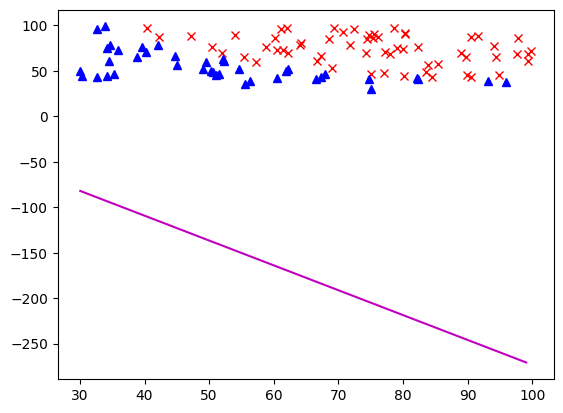

In [163]:
with open("./admission.txt") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)
    y = data[:, 2:3].T
    x = data[:, :2].T
    X = np.concatenate([np.ones([1, x.shape[1]]), x])
 
print(f'{X.shape=}')
print(f'{y.shape=}')

X.shape=(3, 100)
y.shape=(1, 100)


def h_fun(X, theta):
    z = theta.T @ X
    h = 1.0 / (1.0 + np.exp(-z))
    return h

def calculate_cost(X, y, theta):
    h = h_fun(X, theta)
    y_1 = -y*np.log(h)
    y_0 = -(1-y)*np.log(1-h)
    return (y_1 + y_0).sum() / X.shape[1]

eps = 1e-5
alpha = 0.001
theta = np.array([[0],[0],[0]])
m = X.shape[1]
cost_prev = 1000

while True:
    cost = calculate_cost(X, y, theta)
    h = h_fun(X,theta)
    h_y_diff = h_fun(X, theta) - y
    gradient = h_y_diff @ X.T
    theta = theta - alpha*gradient.T / m
    if cost_prev - cost <= eps: 
        break
    cost_prev = cost

print(theta)
x1_db = np.arange(X[1, :].min(), X[1, :].max(), 1)
x2_db = -theta[0, 0]/theta[2, 0] - theta[1, 0]/theta[2, 0]*x1_db
plt.figure()
plt.plot(X[1, y[0].astype(bool)], X[2, y[0].astype(bool)], 'rx')
plt.plot(X[1, ~y[0].astype(bool)], X[2, ~y[0].astype(bool)], 'b^')
plt.plot(x1_db, x2_db, '-m')


Zadanie 3

[[-0.35925331]
 [ 0.62248648]
 [ 0.92946279]
 [ 0.37850018]]


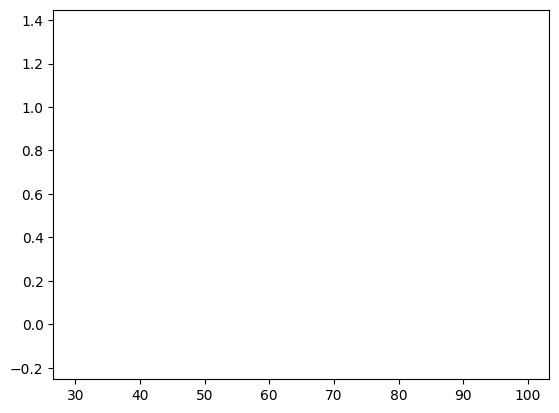

In [174]:
with open("./admission.txt") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)
    y = data[:, 2:3].T
    x1 = data[:, :1].T
    x2 = data[:, 1:2].T
    X = np.concatenate([np.ones([1, x1.shape[1]]), x1, x2, x1**2])

X_max = X.max(axis=1)
X_max.shape = [X_max.shape[0], 1]
X_min = X.min(axis=1)
X_min[0] = 0
X_min.shape = [X_min.shape[0], 1]
X = (X - X_min) / (X_max - X_min)

eps = 1e-7
alpha = 0.01
theta = np.array([[0], [0], [0], [0]])

def h_fun(X, theta):
    return theta.T @ X

def calculate_cost(X, y, theta):
    m = y.size
    h = h_fun(X, theta)
    return (1/(2*m)) * np.sum(np.power(h - y,2))


m = y.size
cost_prev = 1000
cost = calculate_cost(X, y, theta)

while True:
    cost = calculate_cost(X, y, theta)
    h = h_fun(X,theta)
    h_y_diff = (h_fun(X, theta) - y)
    gradient = h_y_diff @ X.T
    theta = theta - alpha*gradient.T / m
    if cost_prev - cost <= eps: 
        break
    cost_prev = cost

print(theta)

plt.plot(x1 , (h_fun(X,theta)), '-r')
# plt.plot(x, y, 'o')
